In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pdb
%matplotlib inline

## DATA ANALYSIS QUESTION:
    Which of the Sexes(Male/Female) had a higher chance of surviving

DATA WRANGLING

In [98]:
raw = pd.read_csv("./titanic.csv")
raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#table representing the column headings, reading from the csv file and splitting the names to make it readable

In [12]:
def splitting(name): 
    last, first = name.split(", ") 
    title_and_first = first.split(". ")
    if len(title_and_first) == 2:
        return last, title_and_first[1], title_and_first[0]
    else:
        return last, " ".join(title_and_first[1:]), title_and_first[0]    
splitting = raw["Name"].apply(lambda x: pd.Series(splitting(x))).rename(columns={2: "Title", 1: "First", 0: "Last"})
sanitized= pd.concat([splitting, raw[["PassengerId", "Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Ticket", "Fare", "Cabin", "Embarked"]]], axis=1)

In [17]:
def check_column(col): 
    return sanitized[col].unique() 

In [18]:
#accesing the full names of ports the passengers took
def get_port(port):
    if port == "C":
        return "Cherbourg"
    elif port == "Q":
        return "Queenstown"
    elif port == "S":
        return "Southhampton"
    else:
        return port 
    
check_column("Embarked")#accessing the Embarked column to see which port did the passengers take
sanitized["Embarked"] = sanitized["Embarked"].apply(get_port)

In [99]:
def get_class(pclass):# accessing the type of classes taken by passengers
    if pclass == 1:
        return "Upper_Class"
    elif pclass == 2:
        return "Middle_Class"
    elif pclass == 3:
        return "Lower_Class"
    else:
        return pclass 
    
check_column("Pclass") 
sanitized["Pclass"] = sanitized["Pclass"].apply(get_full_class)

In [100]:
sanitized.head()

,Last,First,Title,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,Braund,Owen Harris,Mr,1,0,Lower,male,22.0,1,0,A/5 21171,7.2500,NaN,Southhampton
1,Cumings,John Bradley (Florence Briggs Thayer),Mrs,2,1,Upper,female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg
2,Heikkinen,Laina,Miss,3,1,Lower,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southhampton
3,Futrelle,Jacques Heath (Lily May Peel),Mrs,4,1,Upper,female,35.0,1,0,113803,53.1000,C123,Southhampton
4,Allen,William Henry,Mr,5,0,Lower,male,35.0,0,0,373450,8.0500,NaN,Southhampton


#This bar graph shows more males boarded than females


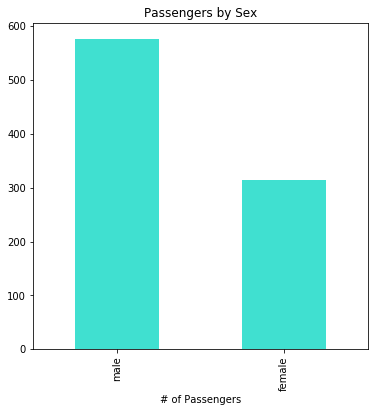

In [102]:
num_sex = sanitized_data["Sex"].value_counts()
#counting the number of different genders that boarded
num_sex.plot(kind="bar", figsize=(6, 6), color="turquoise", title="Passengers by Sex").set_xlabel("# of Passengers")
print ("#This bar graph shows more males boarded than females")

# This bar graph shows that there were more fatalities than survivors 


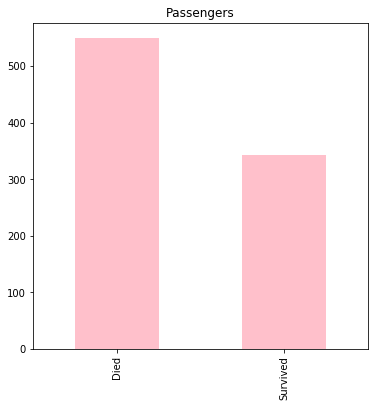

In [117]:
def condition(num):
    if num == 0:
        return "Dead"
    elif num == 1:
        return "Survived"

num_survived = sanitized_data["Survived"].apply(survival_condition).value_counts()
num_survived.plot(kind="bar", figsize=(6, 6), color="pink", title="Passengers").set_xlabel("")
num_survived.head()
print ("# This bar graph shows that there were more fatalities than survivors ")

In [120]:
#from the graph, which gender mostly survived

In [106]:
#How much of males & females died/survived?

In [111]:
all_with_age = survived[pd.notnull(survived["Age"])] 
#sanitizing the data by ridding any rows/tuples with no data in age
def gender_data(sex="female"):
    subset = all_with_age[all_with_age["Sex"] == sex]
    return subset[~subset.isin(children)].dropna() 
women = gender_data()
men = gender_data(sex="male")

In [112]:
survival_subset = sanitized_data[["Pclass", "Sex", "Age", "Survived"]]

In [114]:
#calculating the survival rates of different classes
def calculate_survived(data, columns=[]):
    survived = data.groupby("Pclass")["Survived"].sum().rename(index=columns[0]) # 1 represents survival, 0 not -- thus, summing wil produce number that survived
    total = data.groupby("Pclass")["Survived"].count() # ignores survival outcome
    perc_survived = (survived/total).apply(lambda x: str(round(x, 2))).rename(index=columns[1])
    return pd.concat([survived, perc_survived], axis=1)
    
survival_rates = pd.concat([calculate_survived(men, columns=["Men", "%"]),
                            calculate_survived(women, columns=["Women", "%"]), 
                            calculate_survived(children, columns=["Children", "% "]),
                           calculate_survived(survival_subset, columns=["Total", "%"]),], axis=1)

print ("Survival rates from different passenger class")
survival_rates

Survival rates from different passenger class


,Men,%,Women,%,Children,%,Total,%
Pclass,,,,,,,,
Lower,29.0,0.13,31.0,0.43,25,0.43,119,0.24
Middle,6.0,0.07,58.0,0.91,19,1.0,87,0.47
Upper,37.0,0.38,80.0,0.98,5,0.83,136,0.63


In [107]:
all_with_age = survival_subset[pd.notnull(survival_subset["Age"])] # dropping all rows with no age data
children = all_with_age[all_with_age["Age"] < 16] # subsetting by <16 years old

def gender_data(sex="female"):
    subset = all_with_age[all_with_age["Sex"] == sex]
    return subset[~subset.isin(children)].dropna() # get adults by dropping all rows that are in children's table

women = gender_data()
men = gender_data(sex="male")

In [108]:
survival_subset = sanitized_data[["Pclass", "Sex", "Age", "Survived"]]

In [119]:
print ("There are fewer children than men and women in the data")

pd.DataFrame({"Women": {0: len(women)}, "Children": {0: len(children)}, "Men": {0: len(men)}})

# how many women had children on board?

There are fewer children than men and women in the data


,Children,Men,Women
0,83,413,218
